In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.optim as optim
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
import random

In [2]:
class RNN(nn.Module):            #setting models
    def __init__(self,INPUT_SIZE,HIDDEN_SIZE,OUTPUT_SIZE):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=HIDDEN_SIZE,
            num_layers=1,
            batch_first=True,
        )
        self.linear = nn.Linear(HIDDEN_SIZE,OUTPUT_SIZE,bias=False)      #a classifier without bias
 
    def forward(self, x,h_0): 
        output, h_n = self.rnn(x, h_0)
 
        outs = []
        for t in range(output.size(1)):
            outs.append(self.linear(output[:, t, :]))
        
        return torch.stack(outs, dim=1), output

In [3]:
net = RNN(1,100,1)  #create models
LR=0.005 

In [4]:
optimizer = torch.optim.SGD(net.parameters(), lr=LR)
criterion=nn.MSELoss()
h_0 = None

In [5]:
x=[]
for i in range(0,451):
    x.append(np.cos(np.sin(i*0.1)))

In [6]:
loss_list=[]
weights=[]
for i in trange(0,400,1):
    X=Variable(torch.Tensor(np.array(x[i:i+49]).reshape((1,-1,1))))
    Y=Variable(torch.Tensor(np.array([x[i+50]]).reshape(1,-1,1)))
    #try to predict with hidden states
    prediction, w = net(X, h_0)
    #calculate the loss
    loss = criterion(prediction[:,-1,:], Y[:,-1,:])
    loss_list.append(loss)
    weights.append(w[0,:,:])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:06<00:00, 63.91it/s]


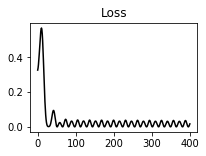

In [7]:
plt.figure(figsize=(3, 2)) 
plt.title("Loss")
plt.plot(range(len(loss_list)), loss_list, 'black')

In [8]:
W_1=torch.stack(weights, dim=0)
W=W_1.detach().numpy()
print(W.shape)
np.savetxt("temp.txt",W.reshape((400,-1)))

(400, 49, 100)
